In [4]:
import matplotlib.pyplot as plt

from dataset.data_loaders import load_dataset, generate_datasets

# Probabilistic time series forecasting with randomized neural networks

Author: Michele Guerra

Date: 18 November 2022

## Time series data

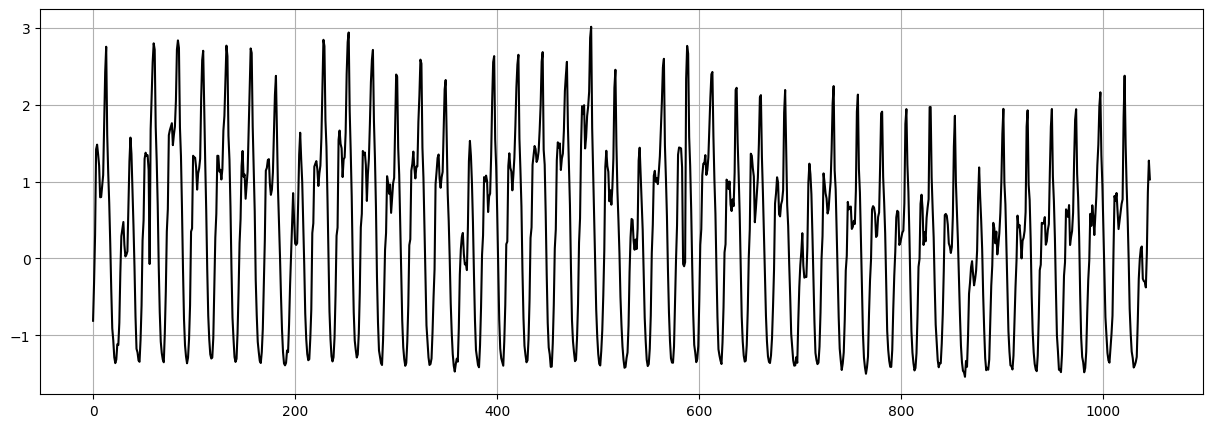

In [5]:
X, Y = load_dataset("acea")
Xtr, Ytr, Xval, Yval, Xte, Yte = generate_datasets(X, Y, test_percent = 0.15, val_percent = 0.15)

# Plot data
fig = plt.figure(figsize=(15,5))
plt.plot(Yte, color='k')
plt.grid()  
plt.show()

## Reservoir Computing and ESN

A Reservoir Computing is a Recurrent Neural Network (RNN) with some peculiar features. It consists of an input layer, a **reservoir** and an output layer.

Its peculiarity is that the only part subjected to training is the output layer, while all the weights of the input layer and, above all, of the reservoir, are fixed randomly at the beginning and never adgjusted afterwards.

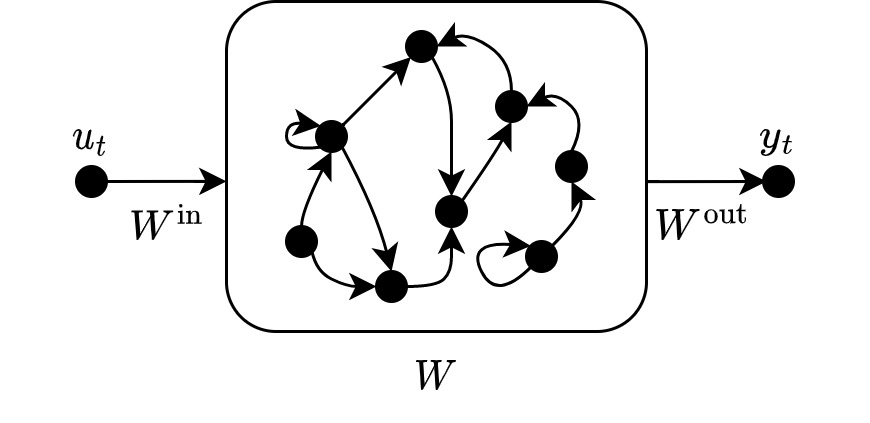

In formulae
$$
    x_{t+1}=f(Wx_t+W^\text{in}u_{t+1})
$$
$$
    y_t=g(W^\text{out}(x_t))
$$

An Echo State Network (ESN) is a Reservoir Computing that satisfies the Echo State Property: loosely speaking, it says that the reservoir dynamics will asymptotically lose dependency on the initial condition of its state.

In [ ]:
# Set ESN hyperparams
config = json.load(open('ESN/configs/ESN_hyperparams.json', 'r'))

Xtr, Ytr, Xval, Yval, Xte, Yte = generate_datasets(X, Y, test_percent = 0.15, val_percent = 0.15)
print("Tr: {:d}, Val: {:d}, Te: {:d}".format(Xtr.shape[0], Xval.shape[0], Xte.shape[0]))

# Train and compute predictions
Yte_pred, _, _, train_embedding, _, val_embedding, _, test_embedding = esnet.run_from_config_return_states(Xtr, Ytr, 
                                                                                                            Xte, Yte, 
                                                                                                            config, 
                                                                                                            validation=True,
                                                                                                            Xval=Xval,
                                                                                                            Yval=Yval)
print("train_embedding shape:", train_embedding.shape)
print('Test MSE {:.3f}'.format(mean_squared_error(Yte_pred, Yte)))